In [ ]:
#Imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold

In [ ]:
#Imports:
from sklearn.datasets import load_wine
data = load_wine()
data.target[[10, 80, 140]]
list(data.target_names)

print(data.data.shape)

labels = ['Alcohol', 'Malic acid', 'Ash', 'Alcalinity', 'Magnesium', 'Total Phenols', 'Flavanoids', 'Nonflavanoid phenols',
          'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

(178, 13)


{'whiskers': [<matplotlib.lines.Line2D at 0x7c1d71e99180>,
 'caps': [<matplotlib.lines.Line2D at 0x7c1d71e98280>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c1d71e9b6d0>,
 'medians': [<matplotlib.lines.Line2D at 0x7c1d71e985b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7c1d71e98be0>,
 'means': []}

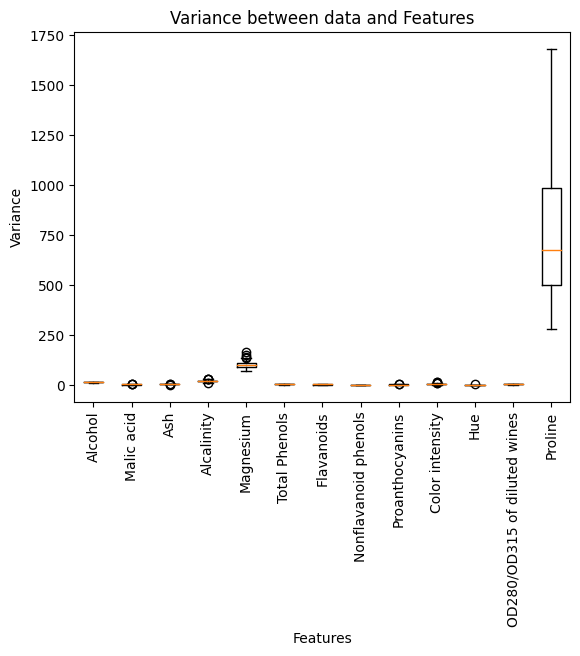

In [ ]:
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Variance")
plt.title("Variance between data and Features")
plt.boxplot(data.data, labels=labels)

In [ ]:
#Defining Universal Plotting Function:
def DimensionalFeaturePlot(X, Y, color_map, num_features_to_use, max_subplots_per_fig, title, column_labels):

  new_canvas, axes = plt.subplots(1, 3, figsize=(16, 6))
  subplot_count = 0
  for i in range(num_features_to_use - 1):
    for j in (range(i + 1, num_features_to_use)):
      if (subplot_count == 3):
        new_canvas, axes = plt.subplots(1, 3, figsize=(16, 6))
        subplot_count = 0
      axes[subplot_count].scatter(X[0:, i], X[0:, j], c=Y, cmap=cmap)
      axes[subplot_count].set_title(title, fontsize=10)
      axes[subplot_count].set_xlabel(column_labels[i])
      axes[subplot_count].set_ylabel(column_labels[j])
      subplot_count += 1

<ipython-input-19-61fd6eae3ced>:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  new_canvas, axes = plt.subplots(1, 3, figsize=(16, 6))


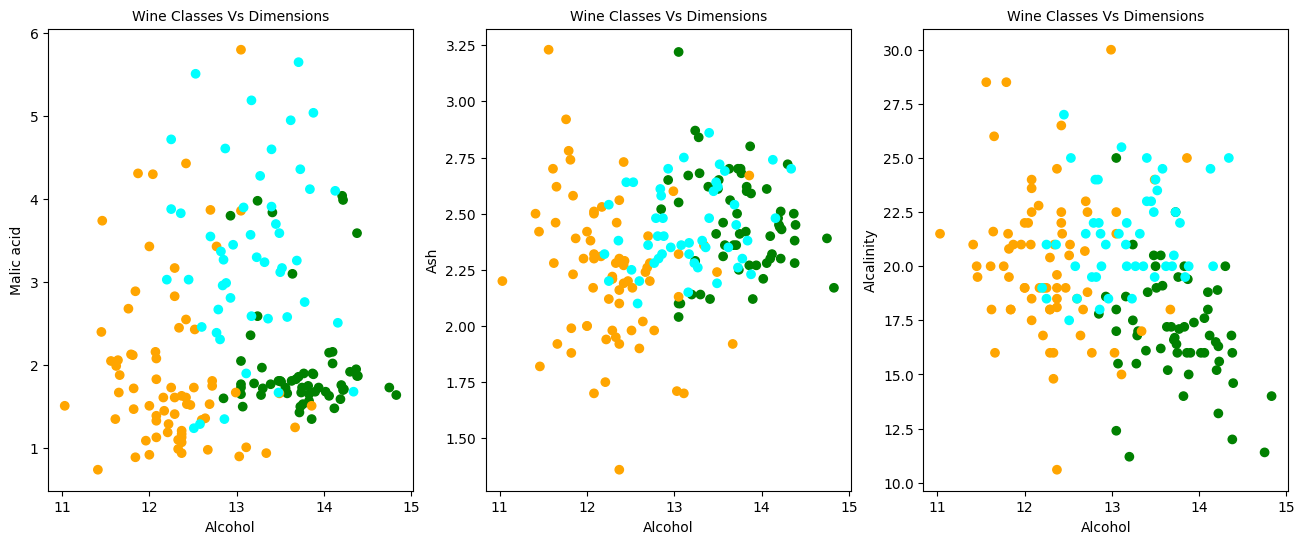

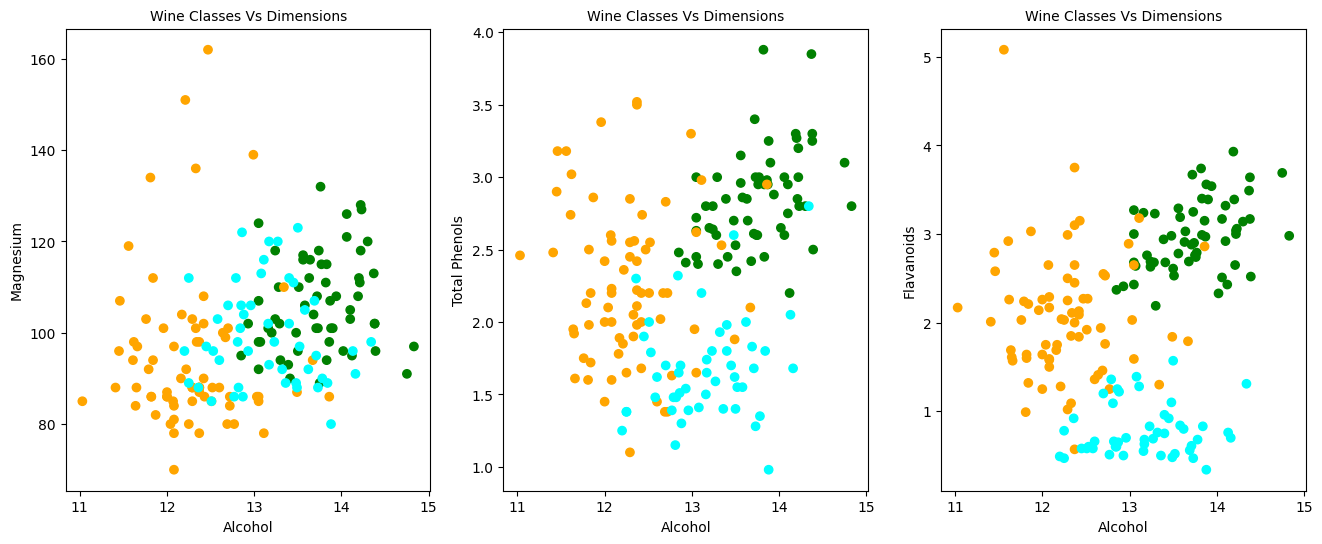

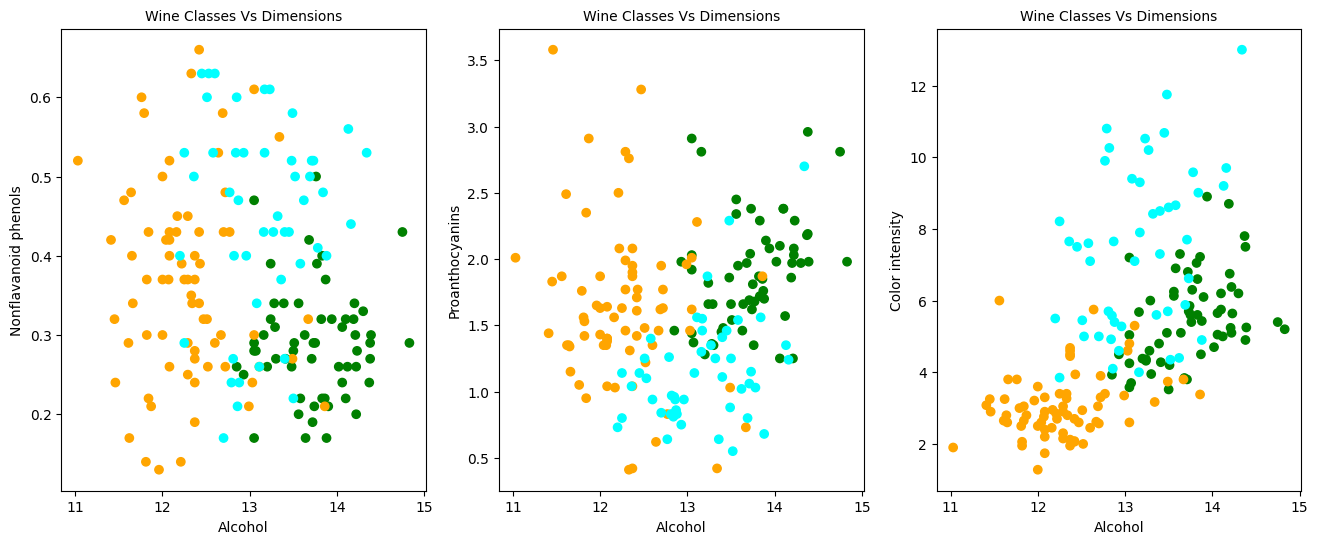

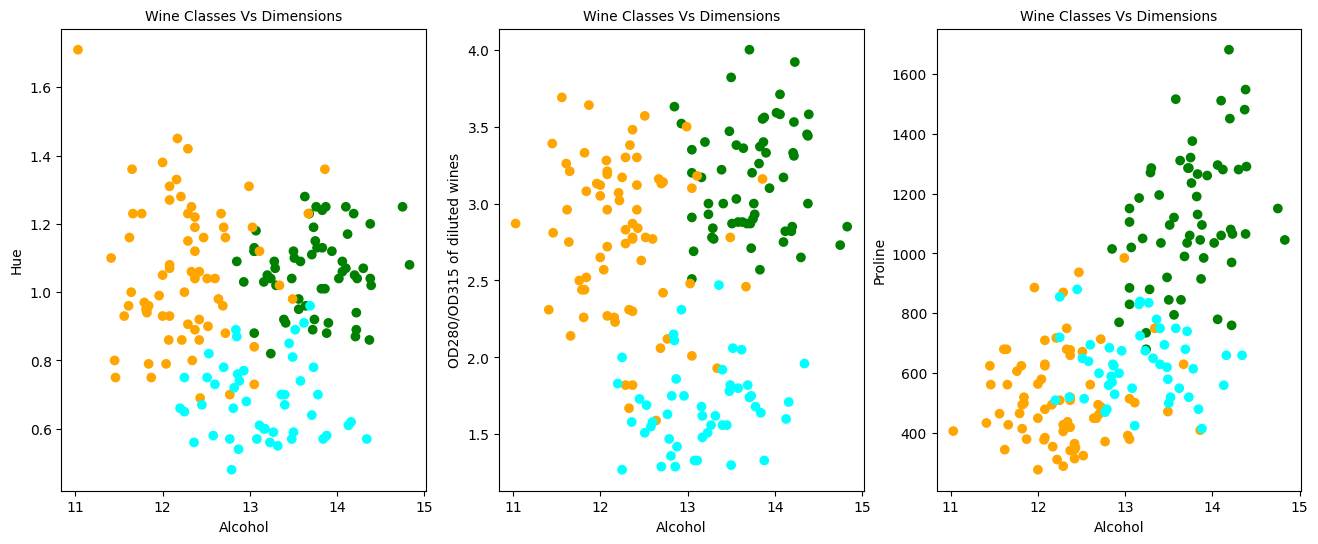

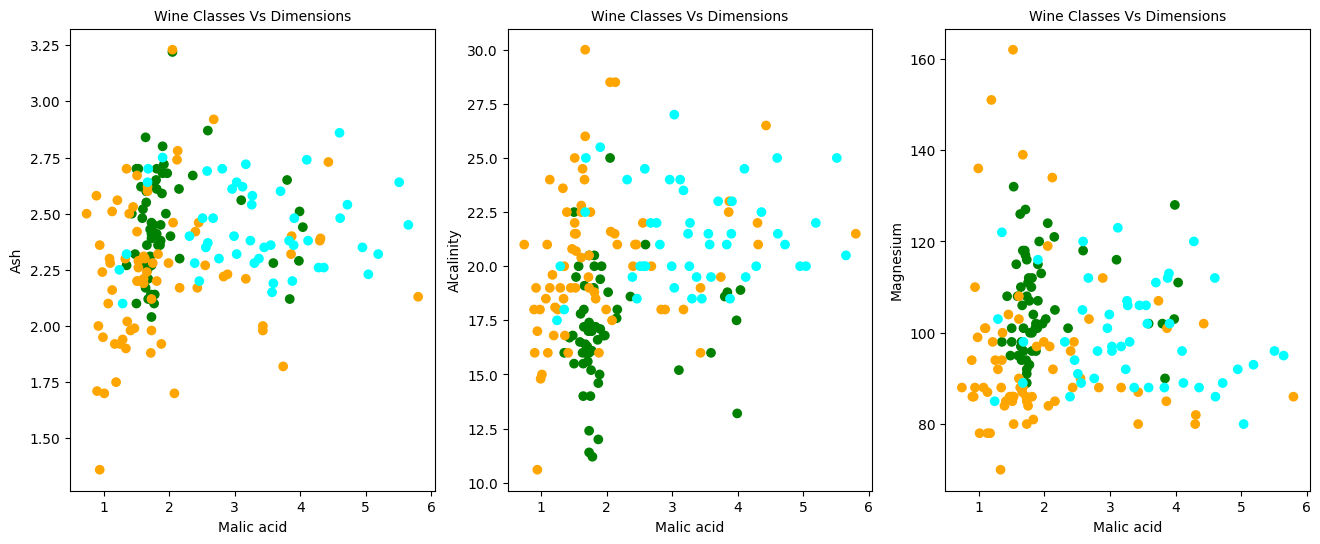

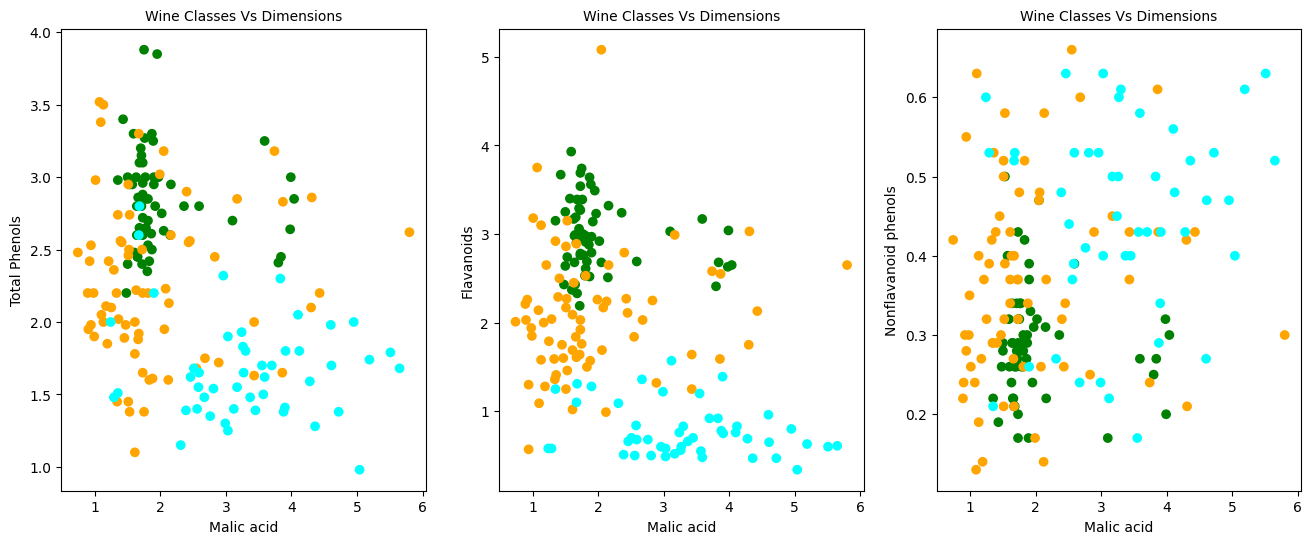

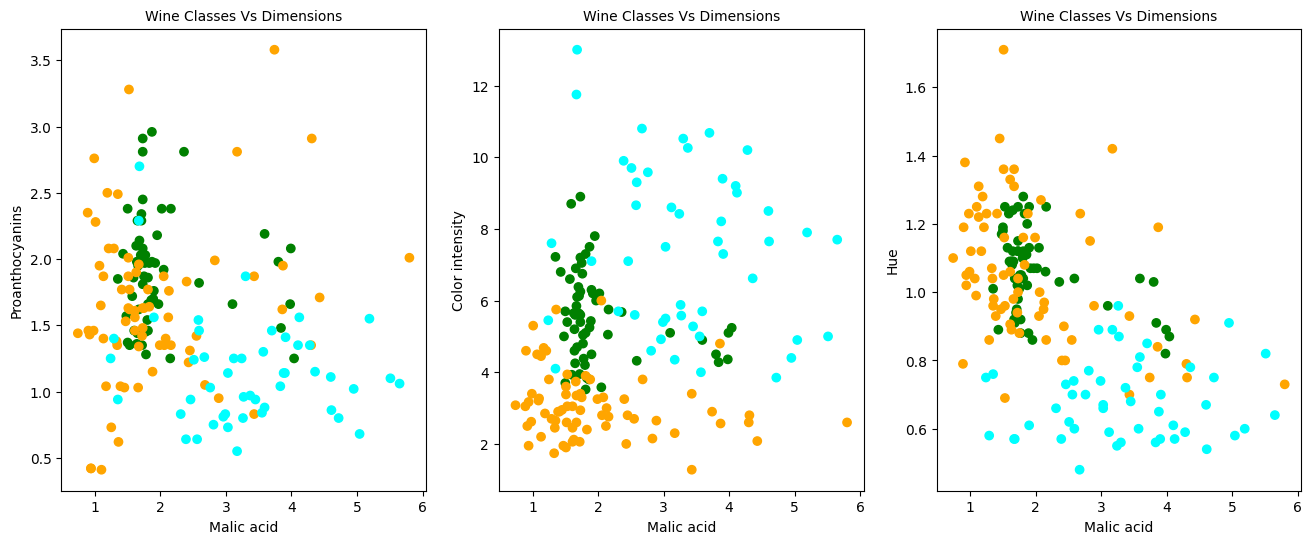

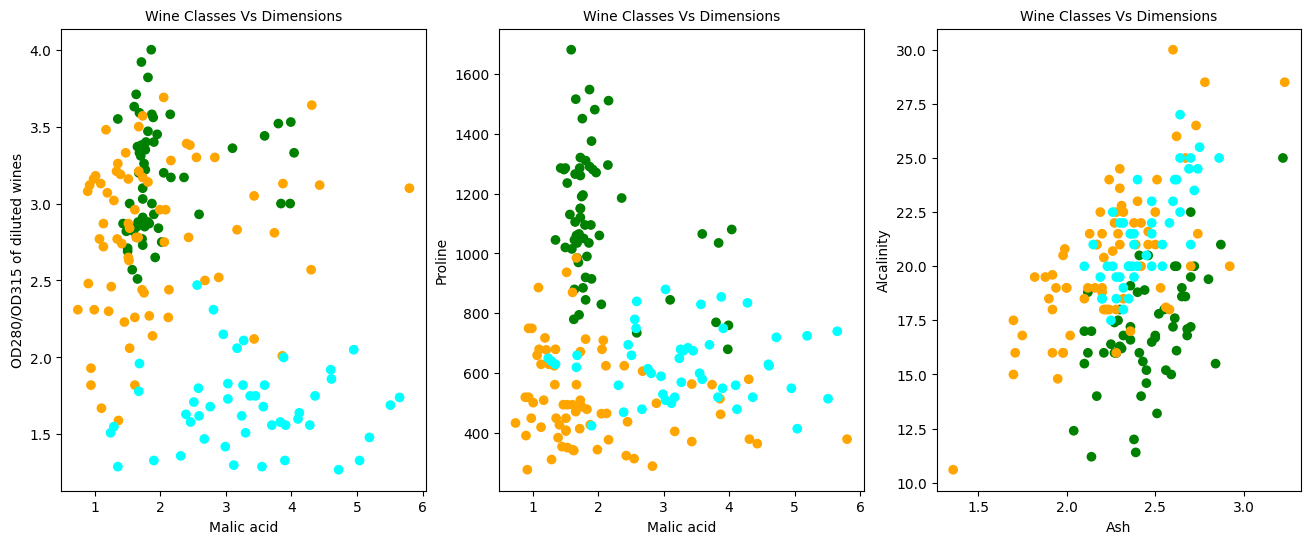

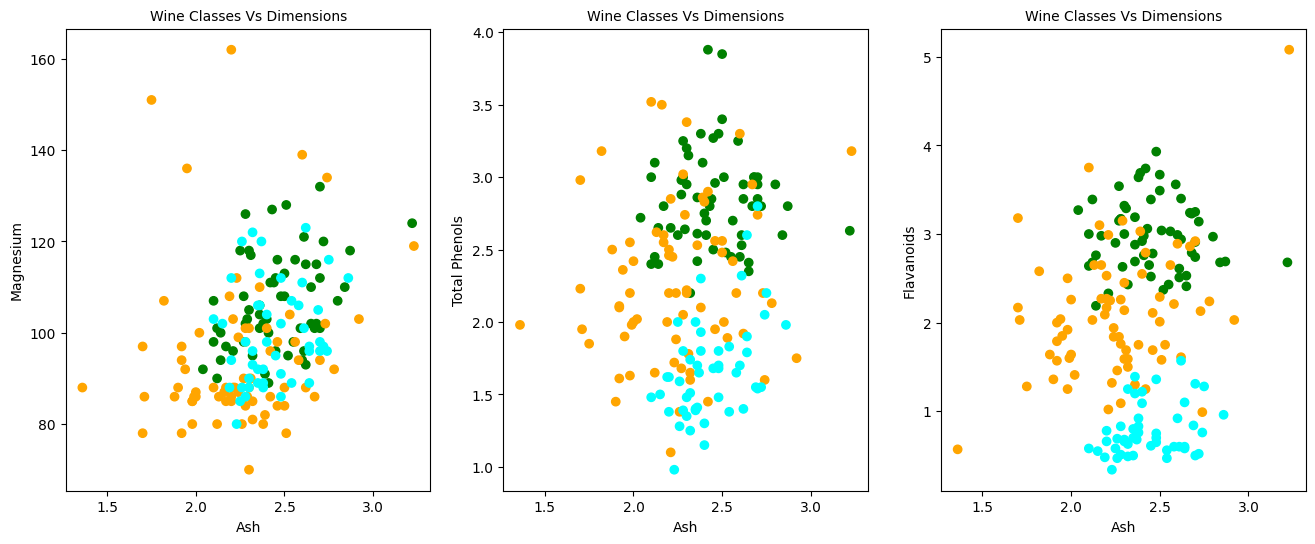

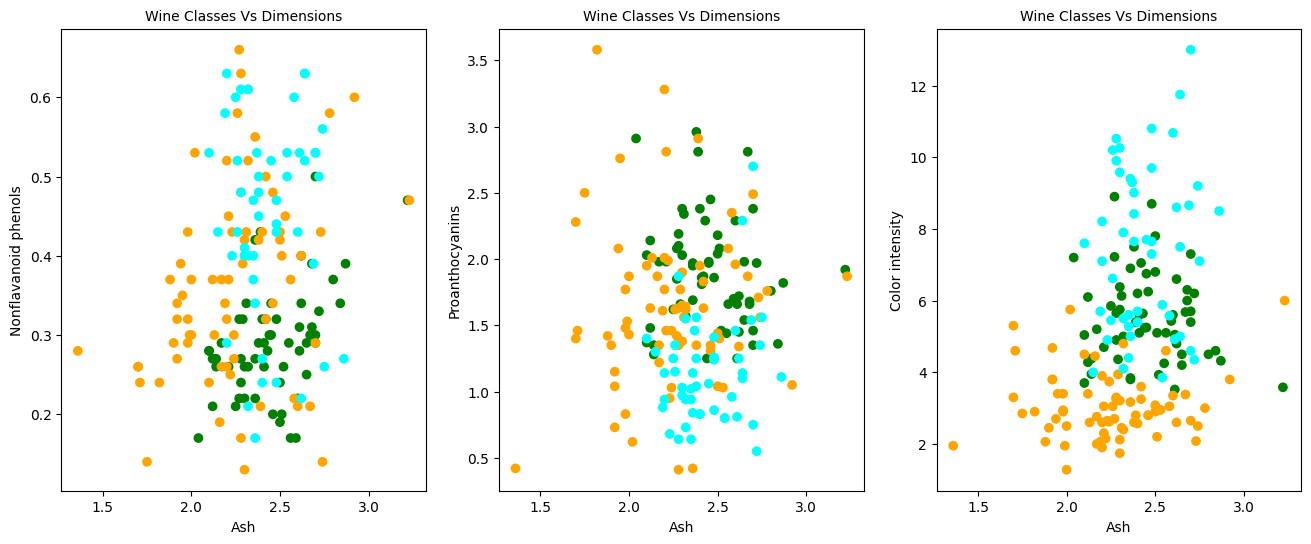

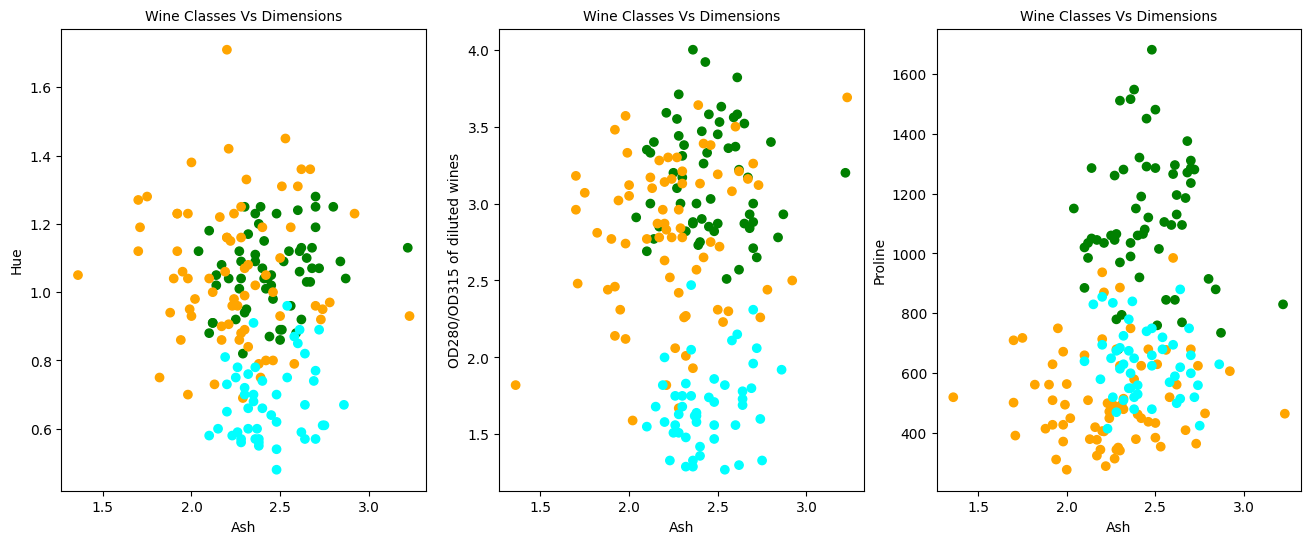

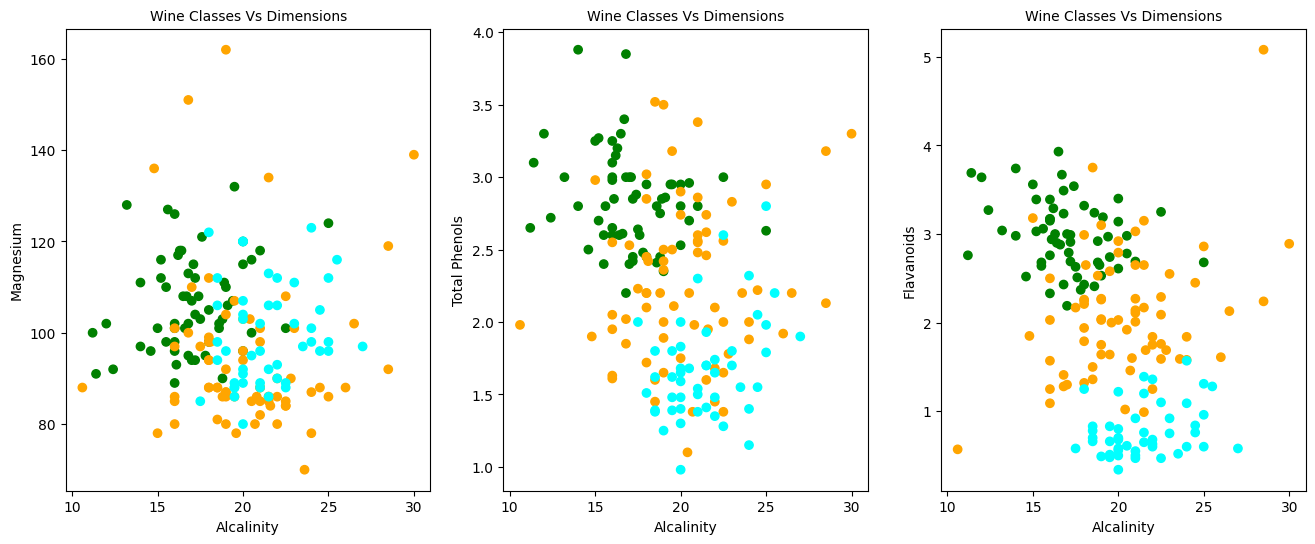

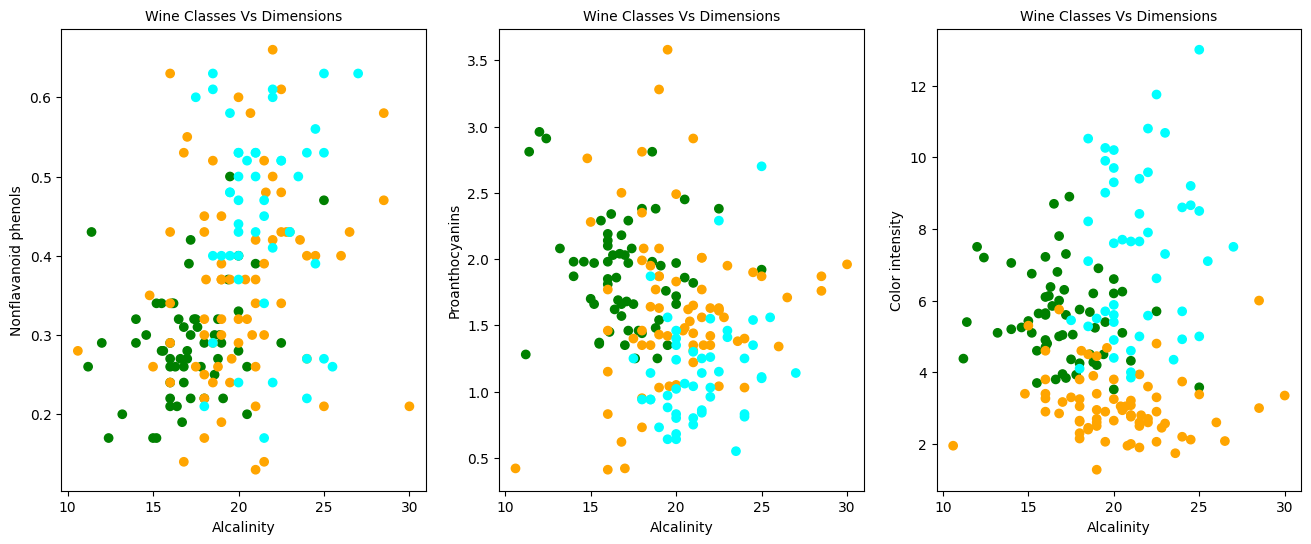

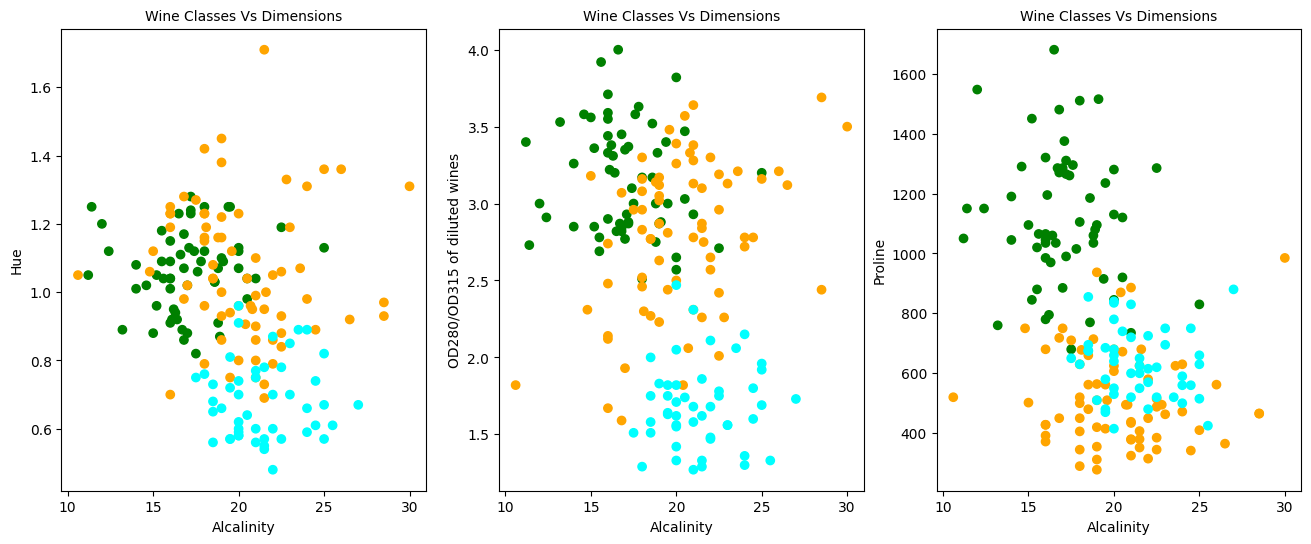

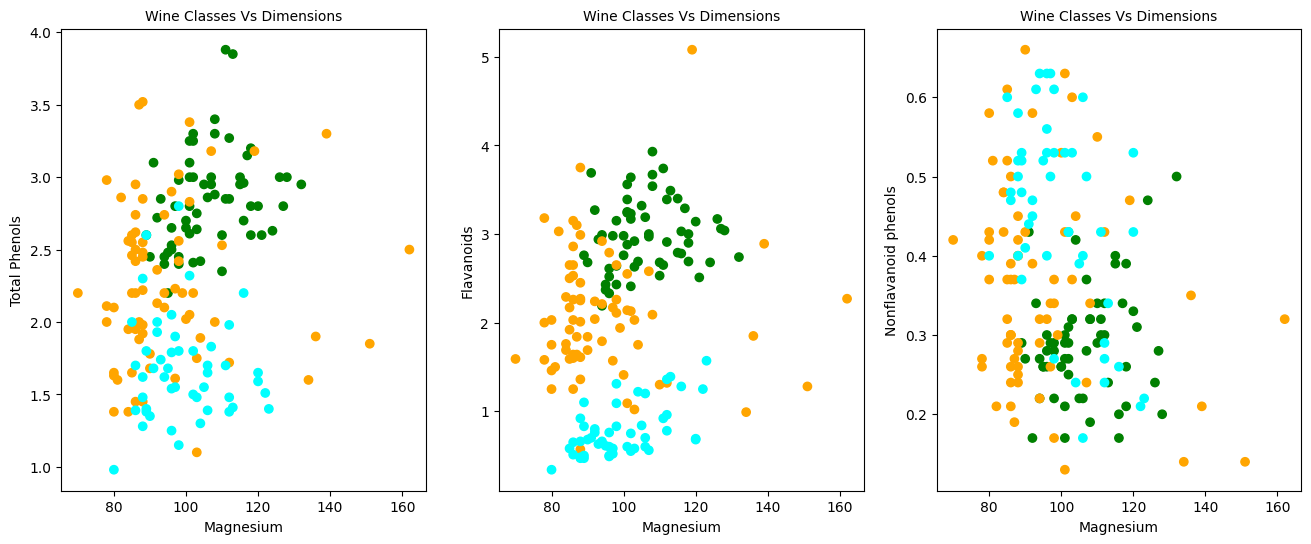

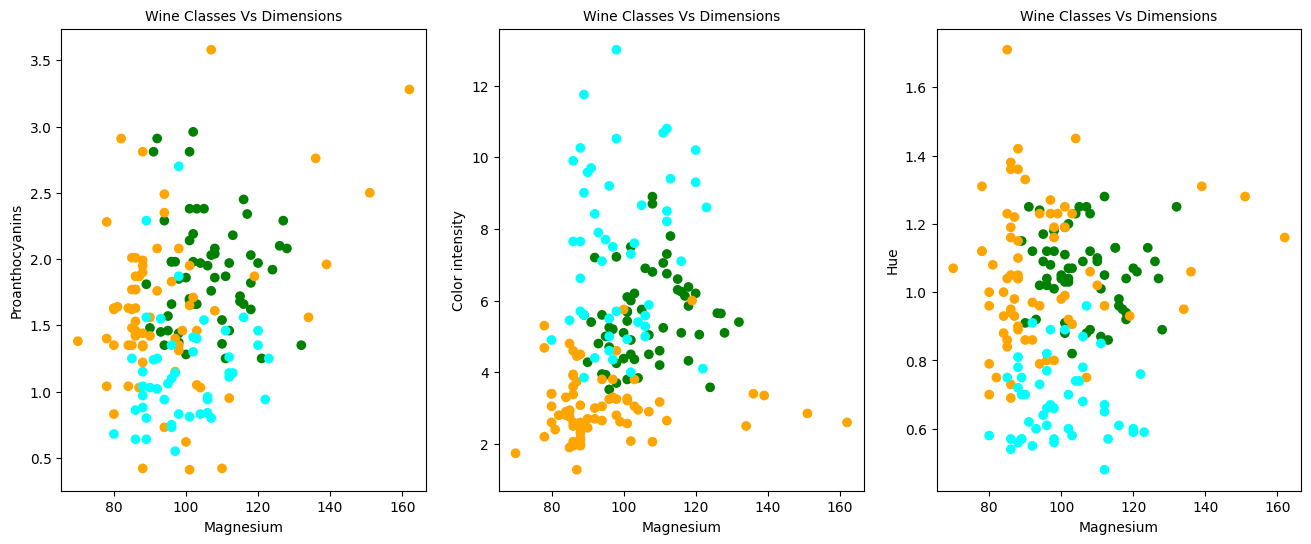

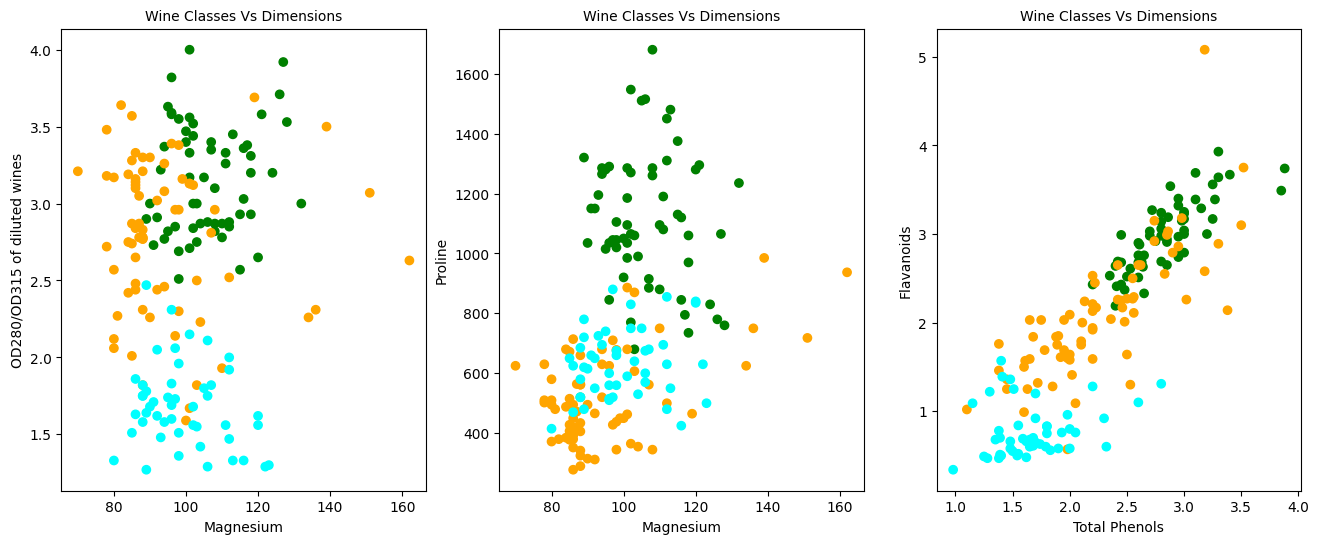

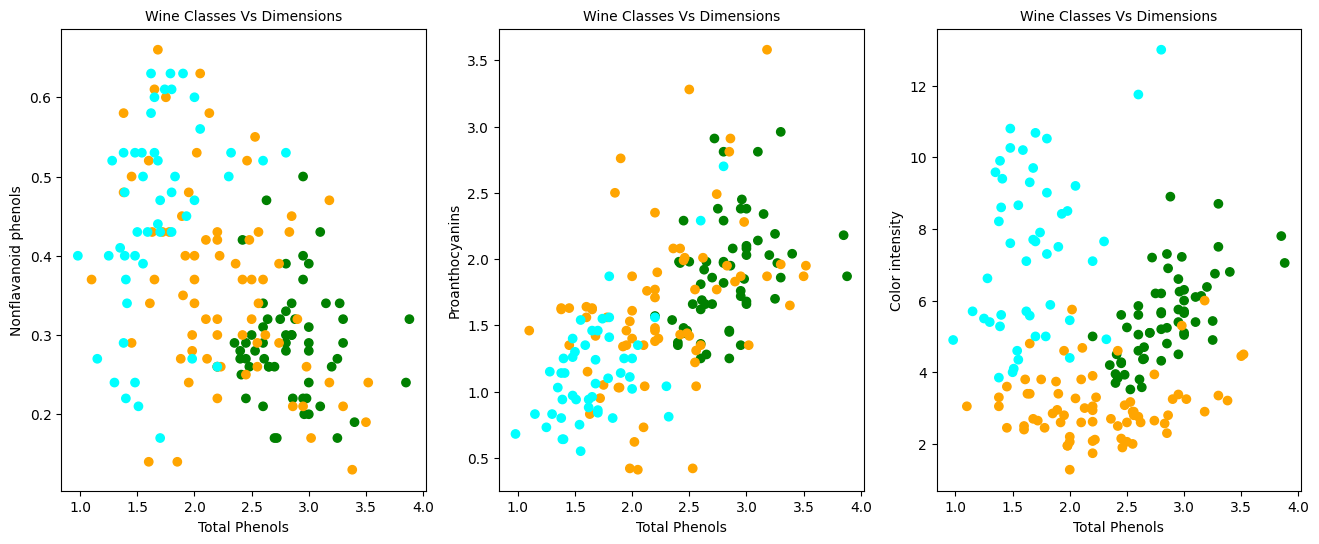

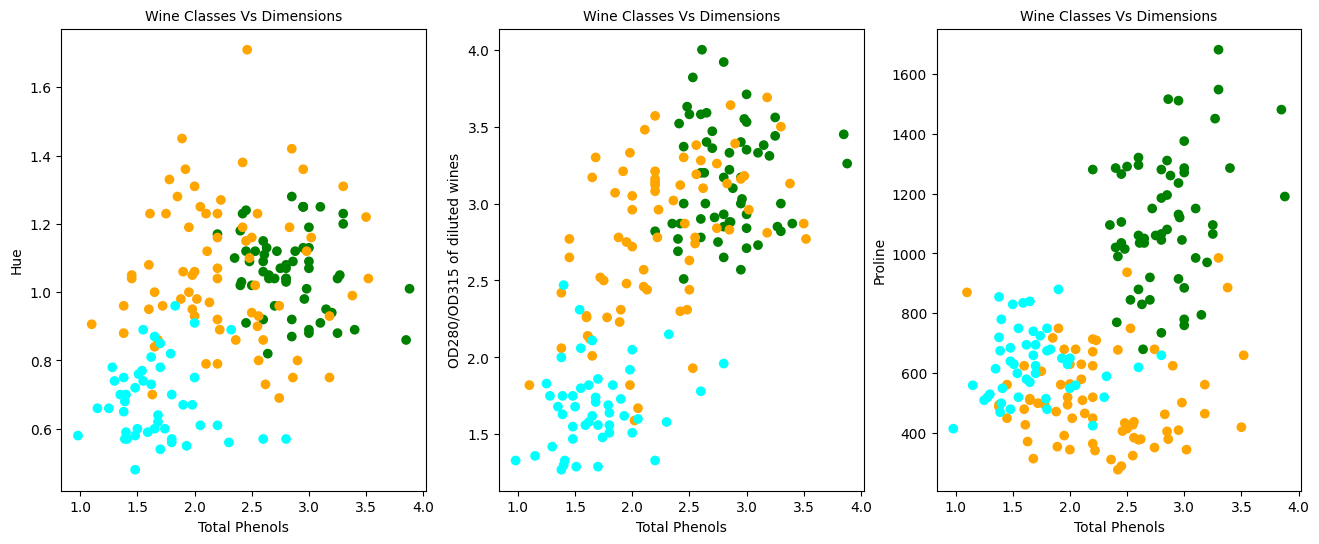

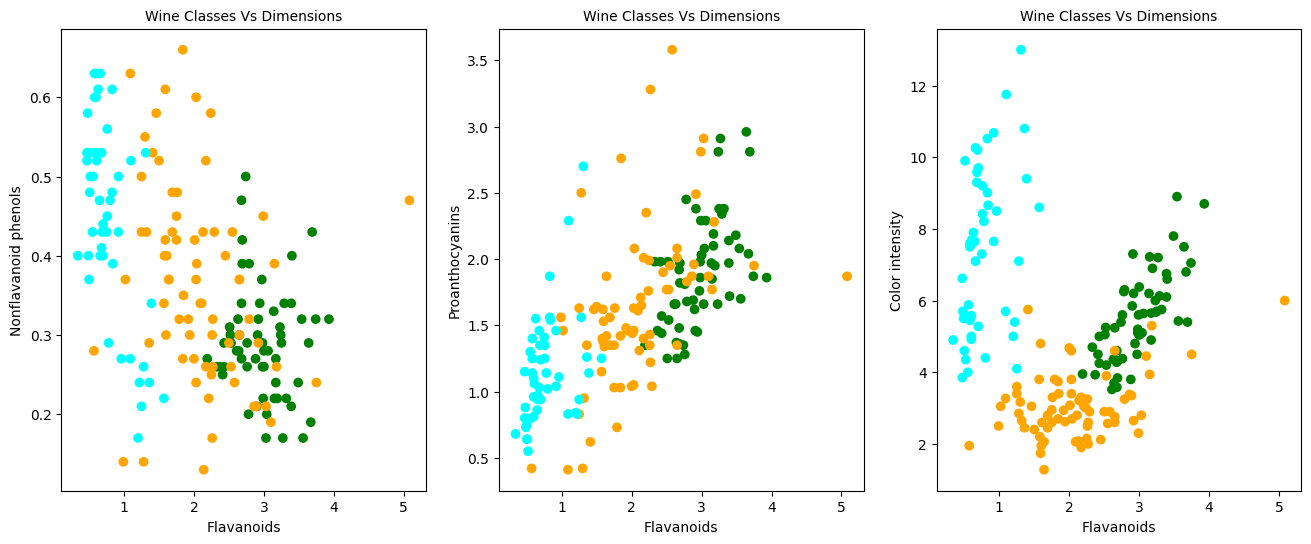

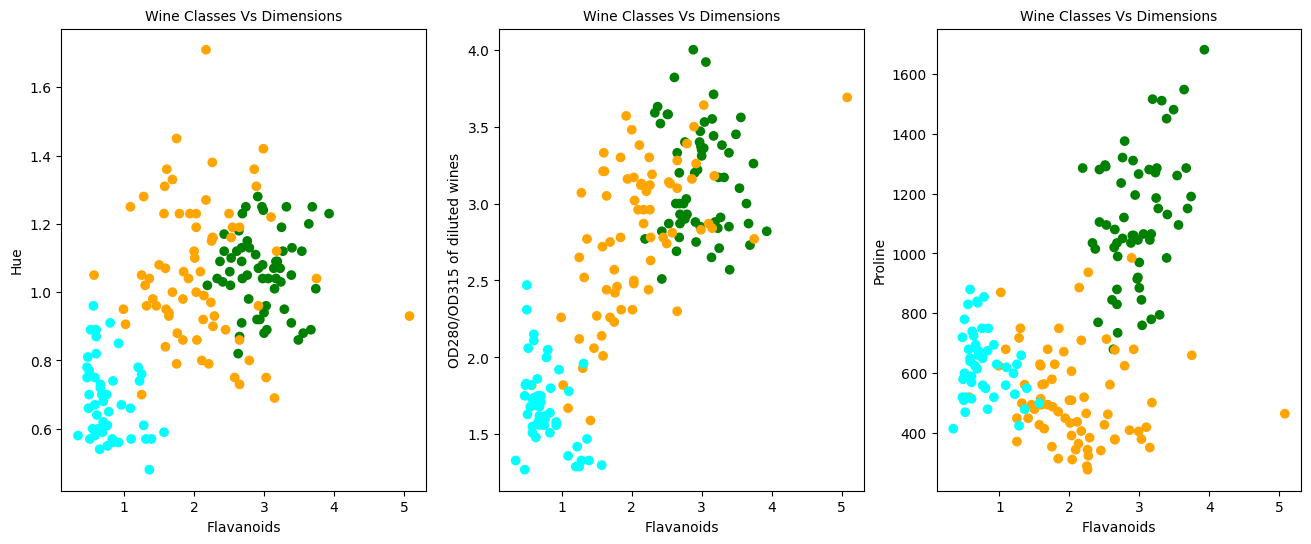

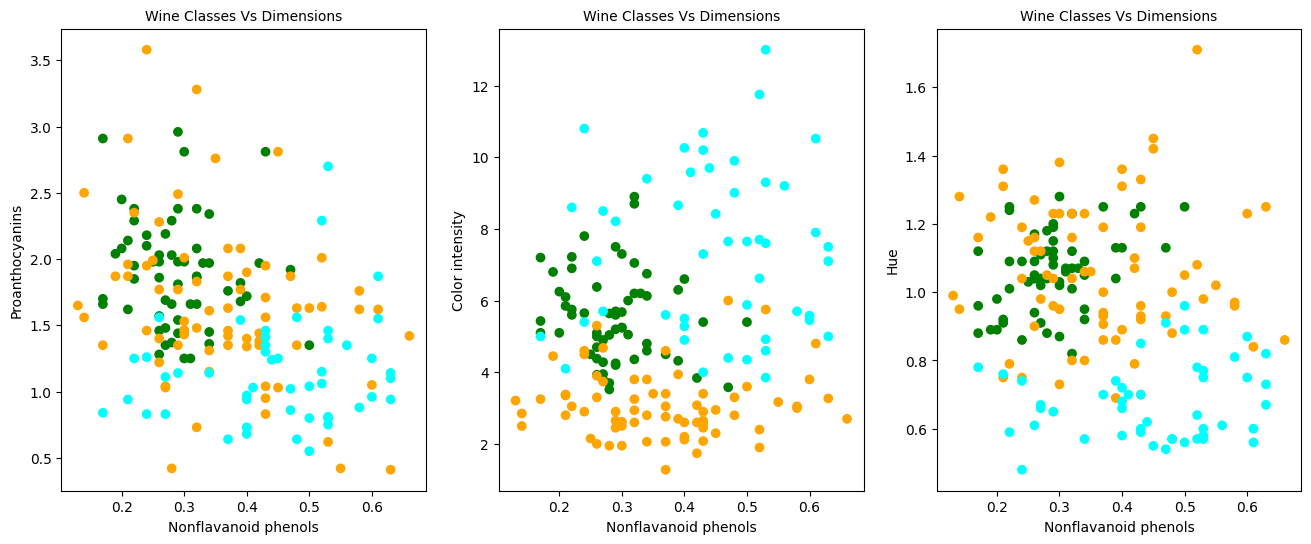

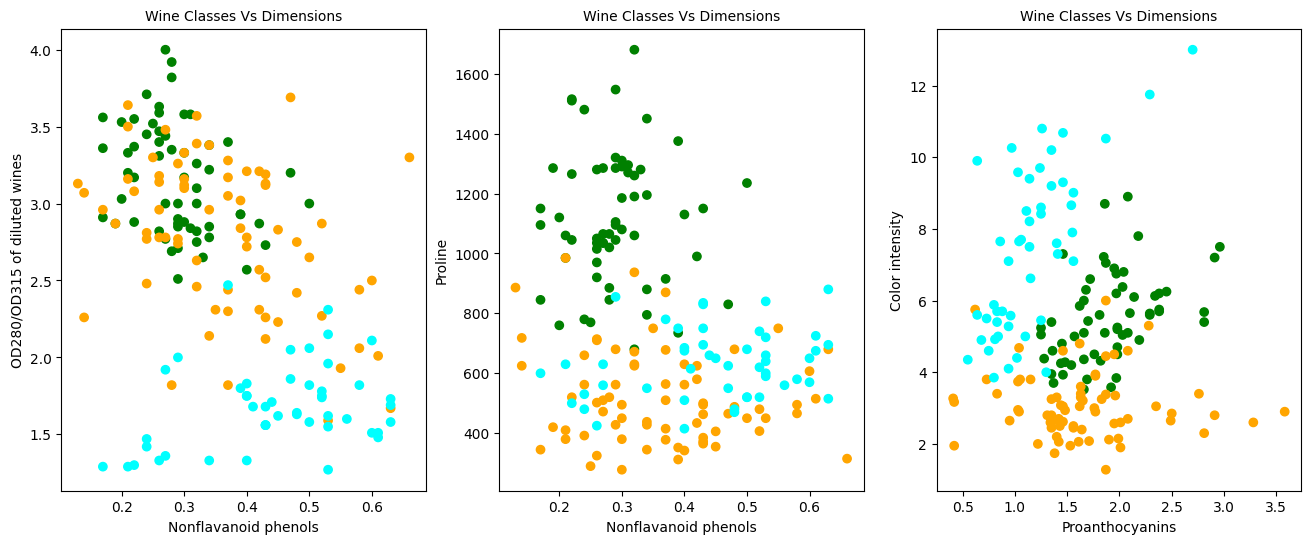

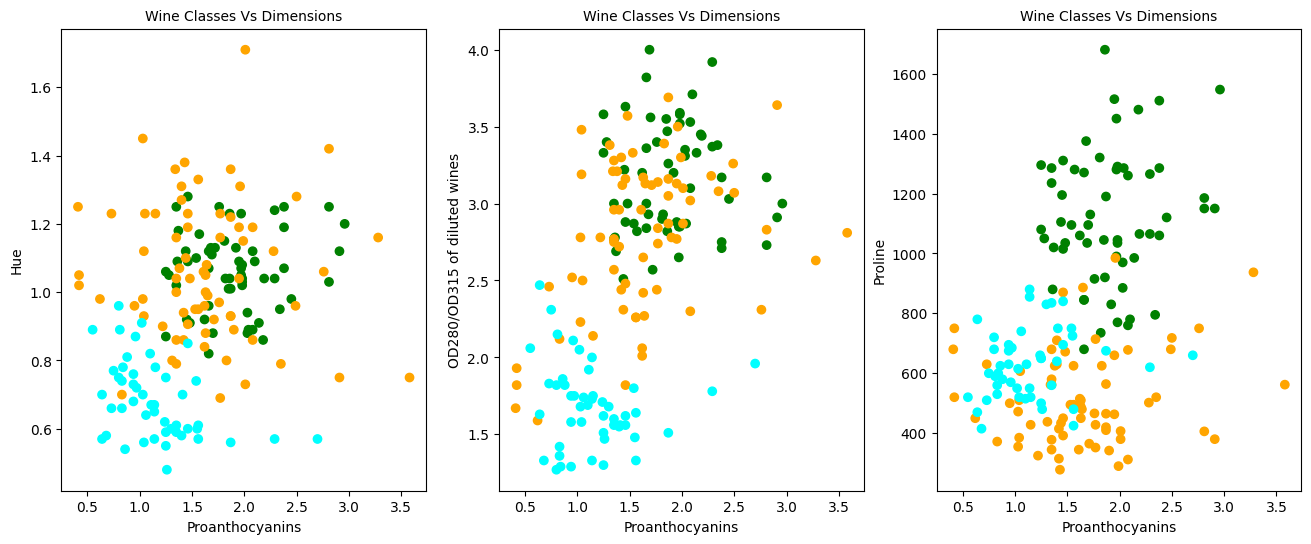

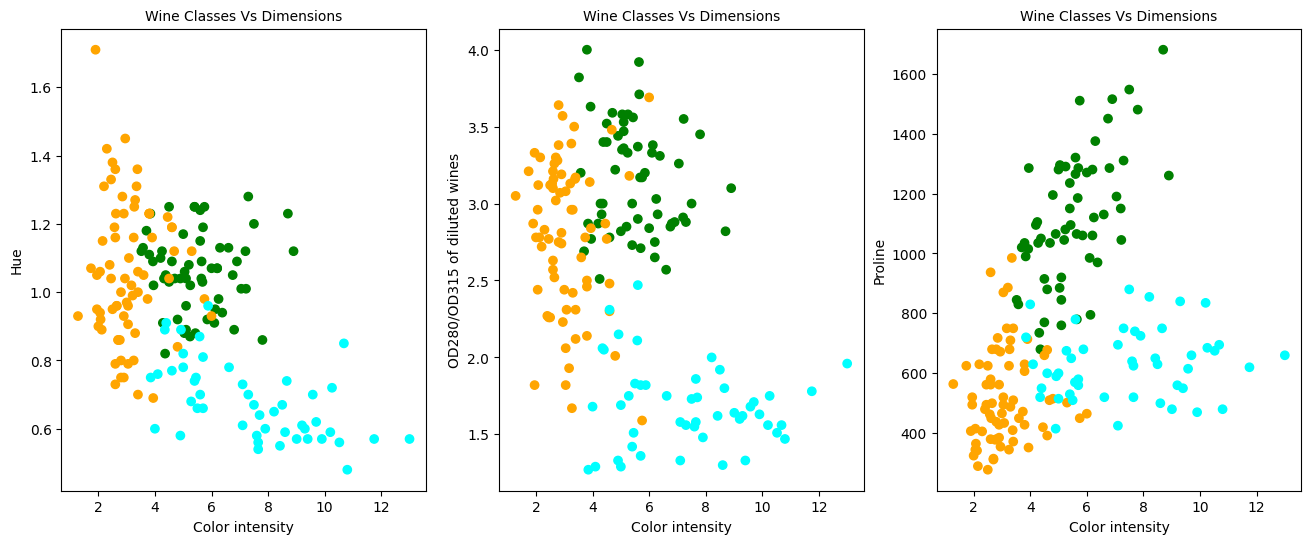

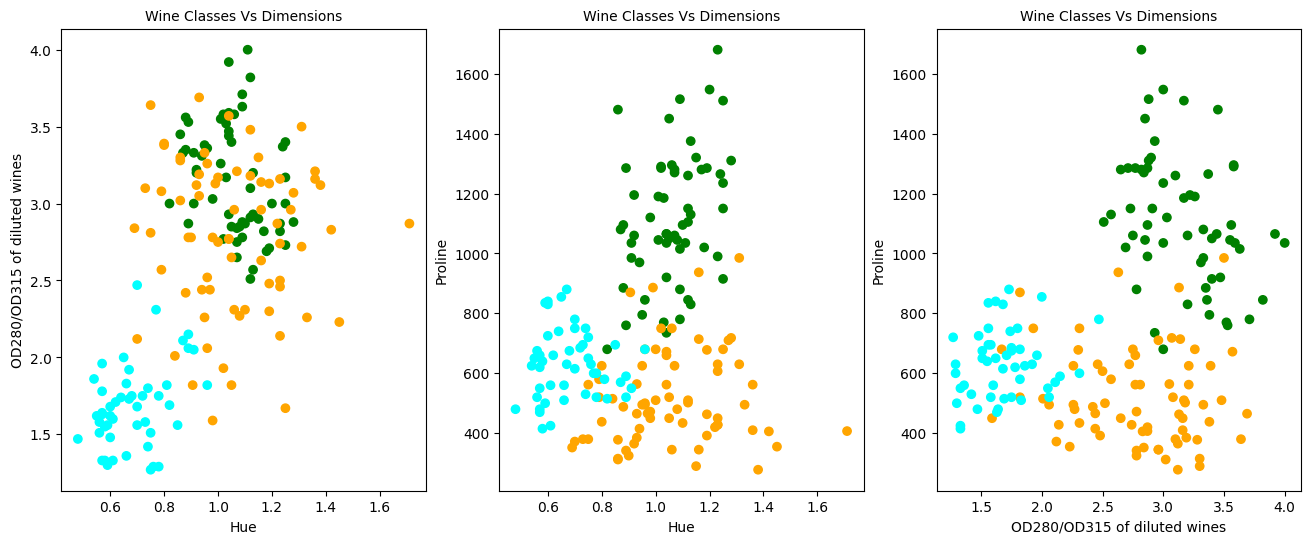

In [ ]:
#Plotting class vs feature:
cmap = colors.ListedColormap(['green', 'orange', 'cyan'])
DimensionalFeaturePlot(data.data, data.target, cmap, 13, 3, "Wine Classes Vs Dimensions", labels)

In [ ]:
#Pipeline For Preprocessing:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

simple_imputer_x = SimpleImputer()
min_max_scaler = MinMaxScaler()

#Check for missing values and set up working pipeline for applying transformations:
X = data.data
Y = data.target

if (np.any(np.isnan(X))):
  prep_pipeline_x = Pipeline([('imputer', simple_imputer_x), ('scaler', min_max_scaler)])
else:
  prep_pipeline_x = Pipeline([('scaler', min_max_scaler)])


X = prep_pipeline_x.fit_transform(data.data)

simple_imputer_y = SimpleImputer()

Y = Y.reshape(-1 ,1)
Y = simple_imputer_y.fit_transform(Y)
one_hot = OneHotEncoder(sparse_output=False)
one_hot.fit(Y)

print(one_hot.transform(Y))

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0.

In [ ]:
print(data.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


{'whiskers': [<matplotlib.lines.Line2D at 0x7c1d80a54940>,
 'caps': [<matplotlib.lines.Line2D at 0x7c1d80a56680>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c1d80a54cd0>,
 'medians': [<matplotlib.lines.Line2D at 0x7c1d80a56bc0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7c1d80a56e60>,
 'means': []}

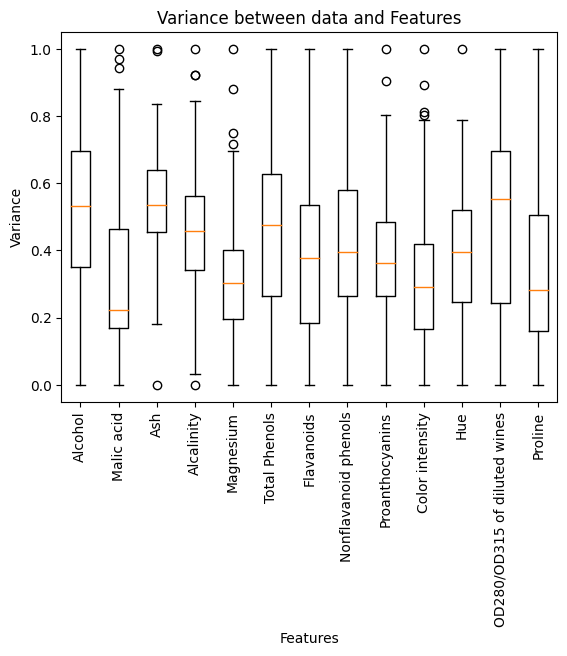

In [ ]:
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Variance")
plt.title("Variance between data and Features")
plt.boxplot(X, labels=labels)

In [ ]:
#Performing Data Split:
x_train, x_test, y_train, y_test = train_test_split(X, Y, stratify=Y, test_size=0.10)

one_hot_encoder = OneHotEncoder(sparse_output=False)
one_hot_encoder.fit(Y.reshape(-1, 1))

print(x_train.shape)
print(y_train.shape)

(160, 13)
(160, 1)


In [ ]:
#Implementing the Keras integration:
from tensorflow import keras
from keras import layers

def generate_model(layers, neurons, learning_rate, output_classes):
  model_layers = []

  model_layers.append(layers.Input((13,)))

  #Hidden Layers:
  for i in range(layers):
    model_layers.append(layers.Dense(neurons, activation='relu'))

  model_layers.append(layers.Dense(output_classes, activation='softmax'))

  keras_model = keras.Sequential(model_layers, "Wine Model Classifier")
  keras_model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss=keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

  return keras_model

In [ ]:
#Defining class to use as wrapper with scikit learn:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
import numpy as np
import tensorflow as tf

class ScikitWineClassifier(BaseEstimator, ClassifierMixin):
  def __init__(self, one_hot_enc, number_of_layers=1, number_of_neurons=32, learning_rate=0.001):
    self.one_hot_enc = one_hot_enc
    self.output_classes = 3
    self.number_of_layers = number_of_layers
    self.number_of_neurons = number_of_neurons
    self.learning_rate = learning_rate
    self.model = self.__generate_model()

  def __generate_model(self):
    model_layers = []

    model_layers.append(layers.Input((13,)))

    #Hidden Layers:
    for i in range(self.number_of_layers):
      model_layers.append(layers.Dense(self.number_of_neurons, activation='relu'))

    model_layers.append(layers.Dense(self.output_classes, activation='softmax'))

    keras_model = keras.Sequential(model_layers, "wine_model_classifier")
    keras_model.compile(optimizer=keras.optimizers.Adam(learning_rate=self.learning_rate), loss=keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

    return keras_model

  def set_params(self, **parameters):
    for parameter, value in parameters.items():
        setattr(self, parameter, value)
        self.model = self.__generate_model()
    return self

  def fit(self, X, y):
    Y_reshaped = y.reshape(-1 ,1)
    y_one_hot = self.one_hot_enc.fit_transform(Y_reshaped)
    self.model.fit(X, y_one_hot, verbose=0)

    return self

  def predict(self, X):
    results_discretized = np.array(list(map(self.transform_pred_classes, self.model.predict(X, verbose=0))))
    results_inverted = self.one_hot_enc.inverse_transform(results_discretized)
    return results_inverted

  def transform_pred_classes(self, y):
    y_class = np.zeros(len(y))
    y_class[np.argmax(y)] = 1
    return y_class

In [ ]:
#Testing Model:
from sklearn.metrics import f1_score
sample_model = ScikitWineClassifier(one_hot)
sample_model.fit(x_train, y_train)
results = sample_model.predict(x_test)

print(results)
print(y_test)
print(f1_score(y_test, results, average='macro'))

[[2.]
 [2.]
 [2.]
 [1.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]]
[[1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [2.]
 [2.]
 [0.]
 [2.]
 [1.]
 [0.]
 [1.]
 [2.]
 [2.]
 [0.]
 [1.]
 [1.]]
0.23484848484848486


In [ ]:
#Running Parameter Search with GridSearchCV:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
#Setting up the parameter search:
number_of_layers = [1, 2, 3]
number_of_neurons = [32, 64, 128]
learning_rates = [0.001, 0.01, 0.1]

param_grid = {"number_of_layers": number_of_layers, "number_of_neurons": number_of_neurons, "learning_rate": learning_rates}
estimator = ScikitWineClassifier(one_hot)
stratified_cv = StratifiedKFold(n_splits=10)
grid_searcher = GridSearchCV(estimator, param_grid=param_grid, scoring='f1_macro', cv=stratified_cv)
grid_searcher.fit(x_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=ScikitWineClassifier(one_hot_enc=OneHotEncoder(sparse_output=False)),
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'number_of_layers': [1, 2, 3],
                         'number_of_neurons': [32, 64, 128]},
             scoring='f1_macro')

In [ ]:
#Retrain new model on entire training data set and see performance:
print(grid_searcher.best_score_)
print(grid_searcher.best_params_)
estimator.set_params(**grid_searcher.best_params_)
estimator.fit(x_train, y_train)

0.877574810810105
{'learning_rate': 0.01, 'number_of_layers': 3, 'number_of_neurons': 64}


ScikitWineClassifier(learning_rate=0.01, number_of_layers=3,
                     number_of_neurons=64,
                     one_hot_enc=OneHotEncoder(sparse_output=False))

In [ ]:
from keras.src.metrics.f_score_metrics import F1Score
y_pred = estimator.predict(x_test)
print(f1_score(y_test, y_pred, average='macro'))

0.8424242424242424
